# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [49]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine --user

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



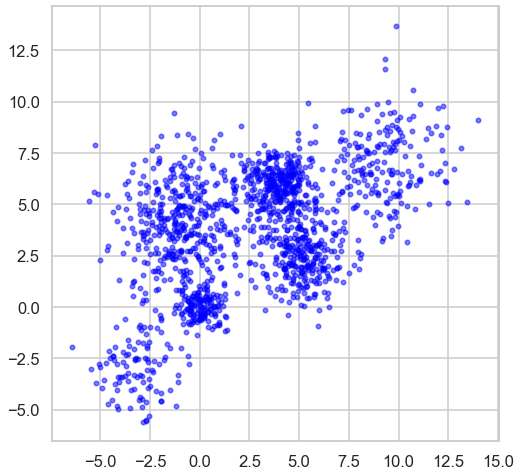

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

# Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

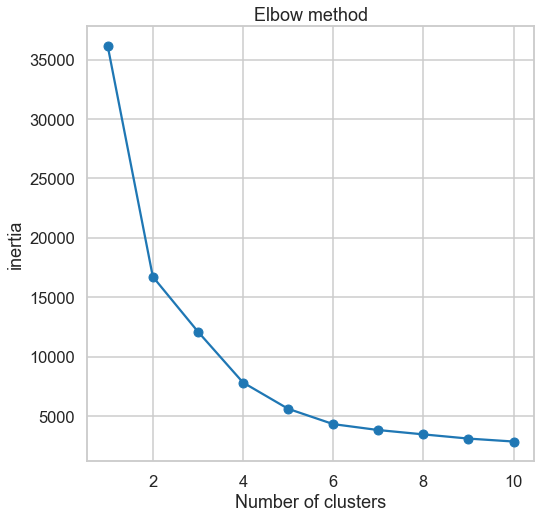

In [12]:
#This represents the elbow method, which is a method used to find the optimum number of clusters. As seen in the inertia graph, the optimum number of clusters is K=2. 
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()


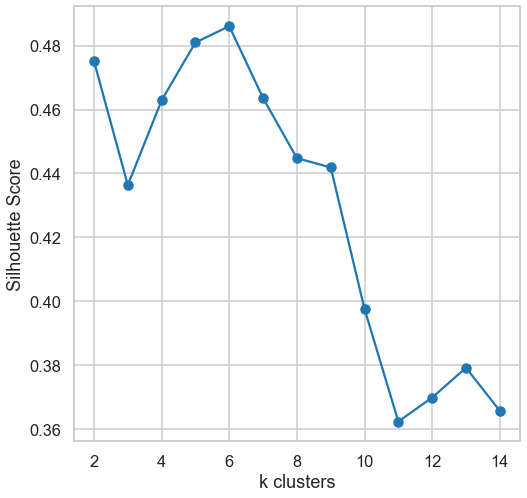

In [12]:
#this represents the silhouette method 
# silhouette score
def silhouette(Multi_blob_Data):
    silhouette_score1 = []
    clusters = list(range(2,15))
    for num_clusters in clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        cluster= kmeans.fit(Multi_blob_Data)
        silhouette_score1.append(silhouette_score(Multi_blob_Data,kmeans.labels_,metric='euclidean'))

    plt.plot(clusters,silhouette_score1)
    plt.scatter(clusters,silhouette_score1)
    plt.xlabel('k clusters')
    plt.ylabel('Silhouette Score')
    
silhouette(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

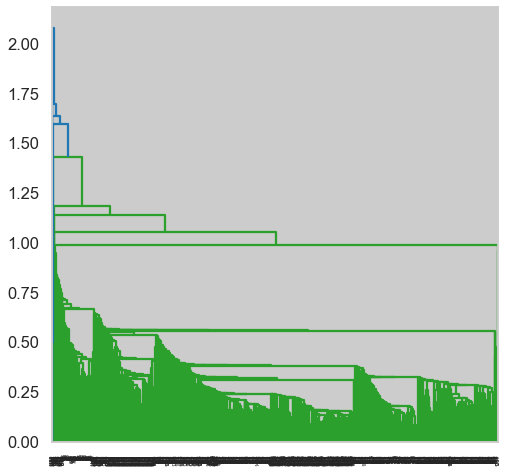

silhouette_score_euclidean=0.08705564851389591


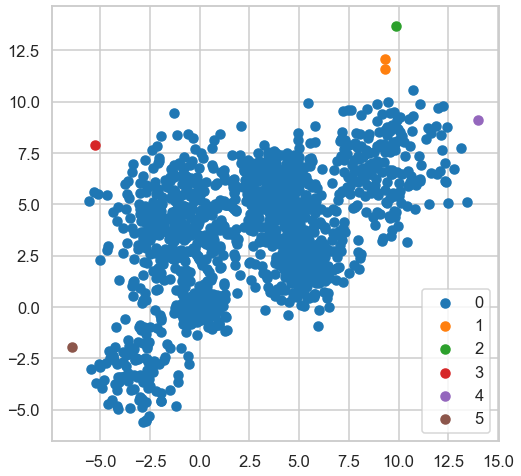

In [4]:
#metric=euclidean

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


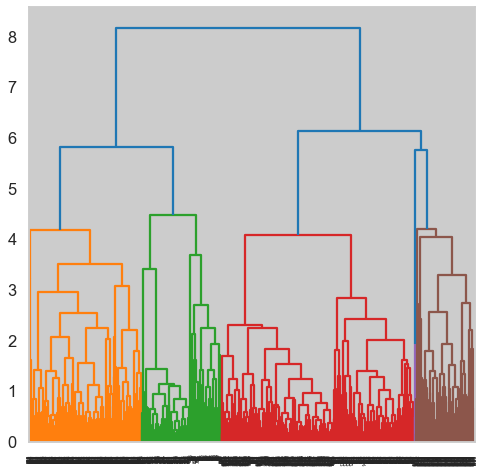

silhouette_score_euclidean=0.41478815574933364


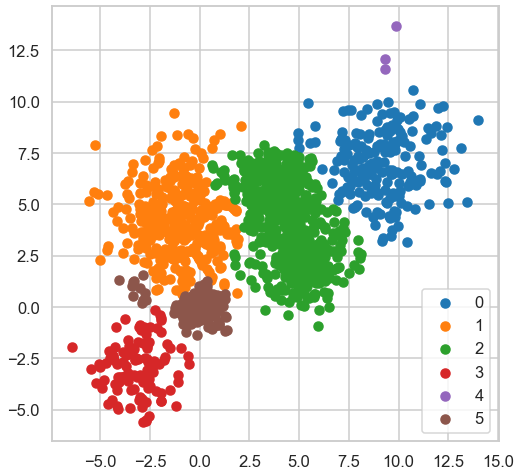

In [5]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


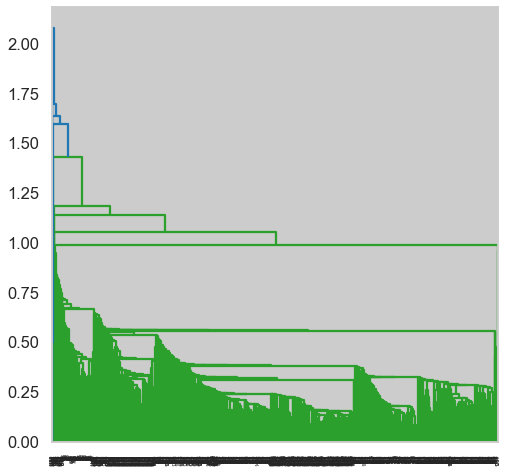

silhouette_score_euclidean=0.45996390896720124


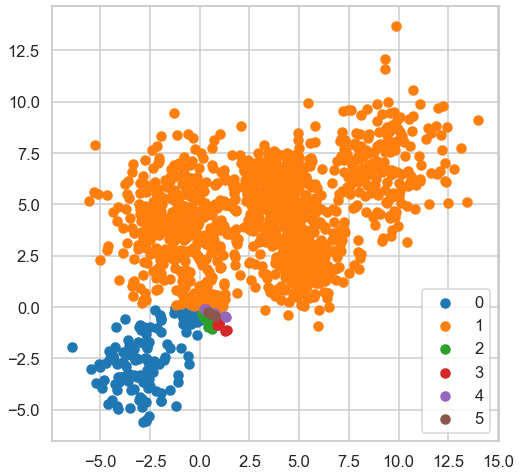

In [6]:
#method=cosine


model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


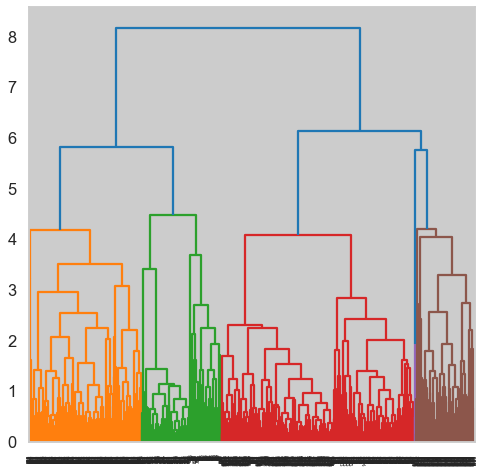

silhouette_score_euclidean=0.6719855302824832


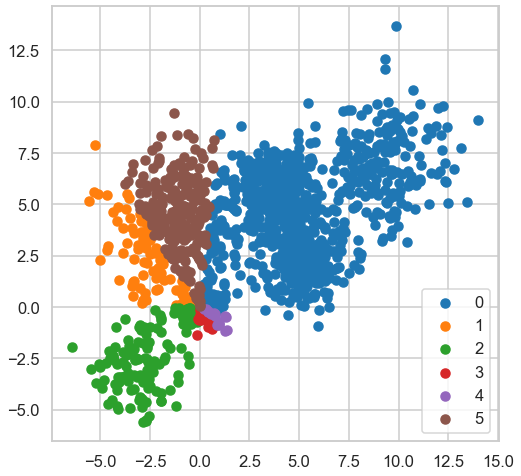

In [7]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


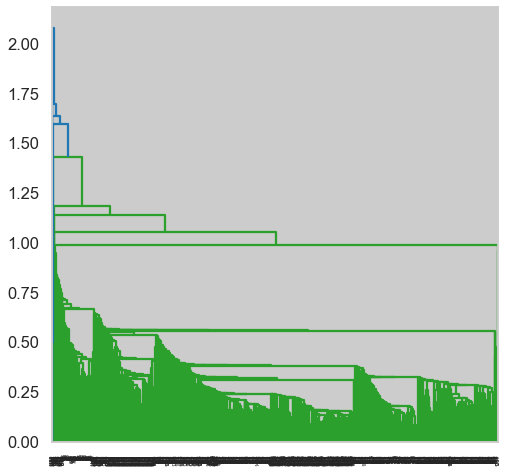

silhouette_score_euclidean=0.09516619170776609


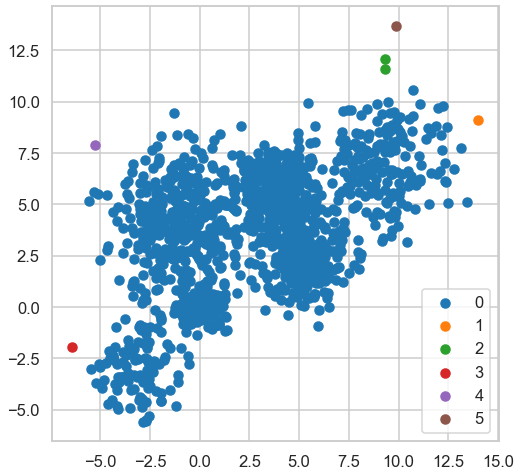

In [8]:
#manhattan method
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


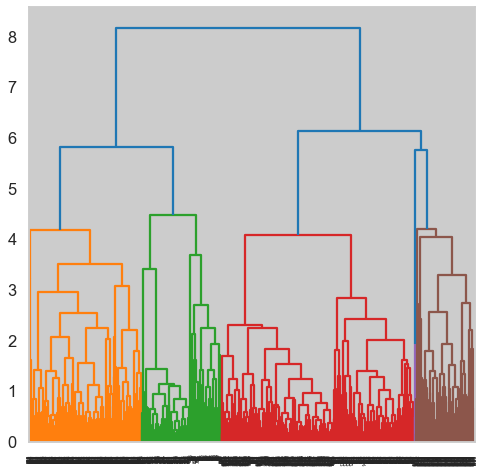

silhouette_score_euclidean=0.39128830534744086


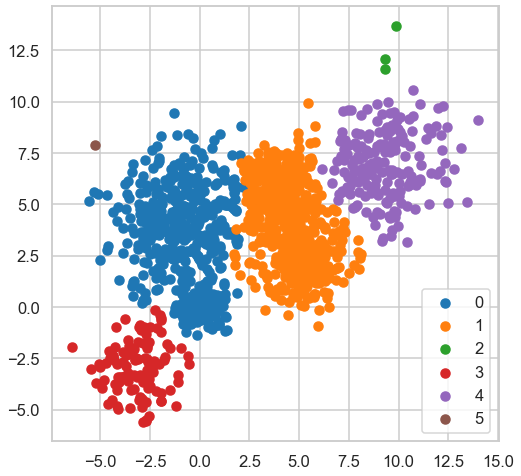

In [9]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

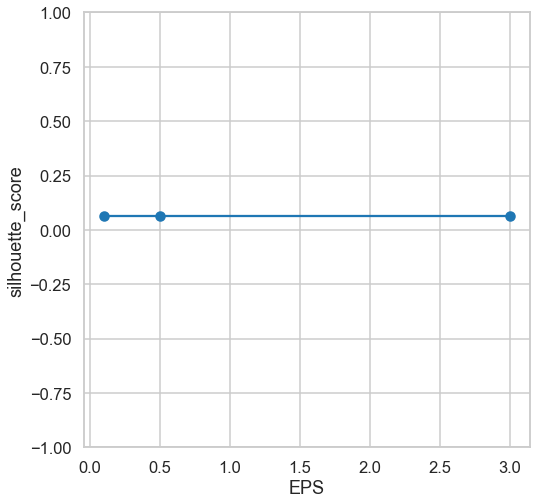

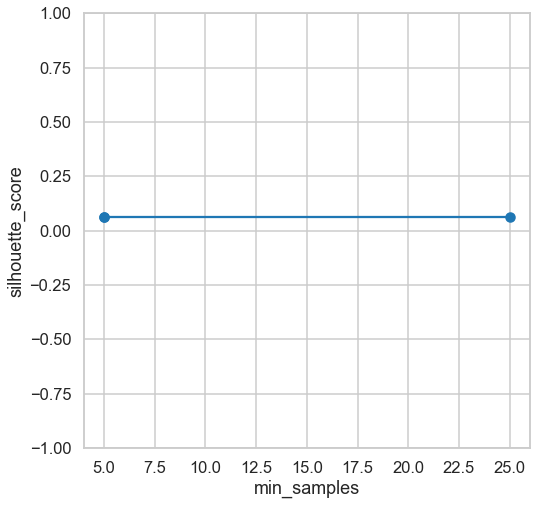

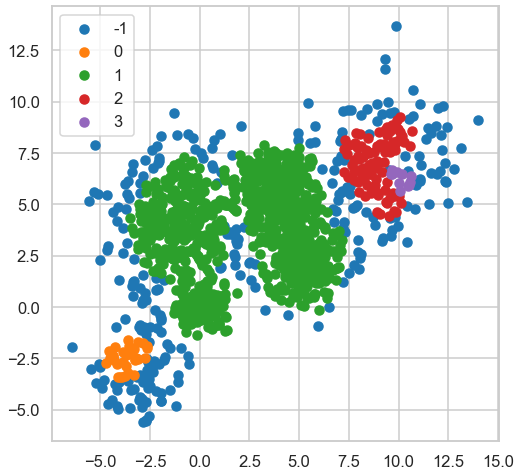

In [21]:

db = DBSCAN(eps=0.7, min_samples=15)
db.fit(Multi_blob_Data)
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 3]
min_samples=[5, 5, 25]
cond=len(np.unique(db.labels_))>1
for eps in eps:
    if(cond):
        epsfinal.append(eps)
        score.append(silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean'))
       
    
plt.plot(epsfinal,score)
plt.scatter(epsfinal,score)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

for min_samples in min_samples:
    if(cond):
        samplesfinal.append(min_samples)
        score1.append(silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean'))
       
    
plt.plot(samplesfinal,score1)
plt.scatter(samplesfinal,score1)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

#for min_samples in range(5,25,1):
    #score = silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean')
    #plt.plot(min_samples, score, marker='o')
    #plt.title('silhouette_score vs min_samples ')
    #plt.xlabel('min_samples')
    #plt.ylabel('silhouette_score')
#plt.show()

u_labels = np.unique(db.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[db.labels_ == i , 0] , Multi_blob_Data[db.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


ValueError: x and y must be the same size

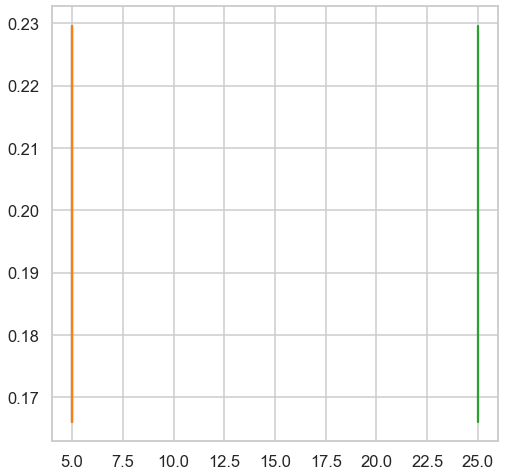

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

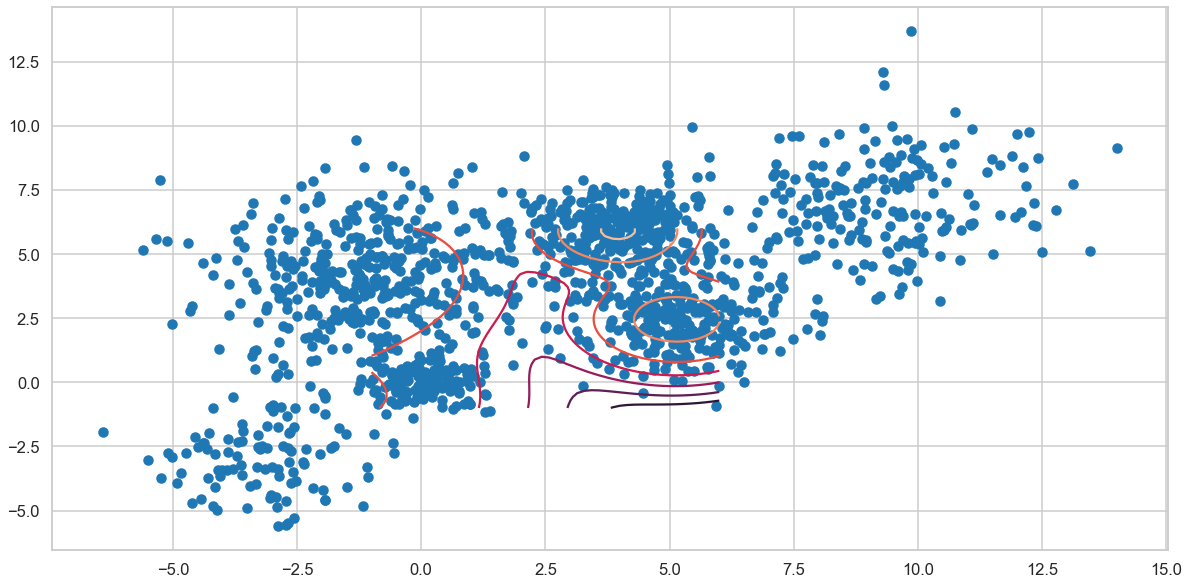

In [25]:
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
gmm.fit(Multi_blob_Data)

#predictions from gmm
labels = gmm.predict(Multi_blob_Data)
frame = pd.DataFrame(Multi_blob_Data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

  
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
plt.show()

#color=['blue','green','cyan', 'black']
#for k in range(0,4):
    #data = frame[frame["cluster"]==k]
    #plt.scatter(data["Weight"],data["Height"],c=color[k])
#plt.show()

# iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [31]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [32]:
iris_data = pd.DataFrame(
    data= np.c_[iris_data['data'], iris_data['target']],
    columns= iris_data['feature_names'] + ['target']
    )

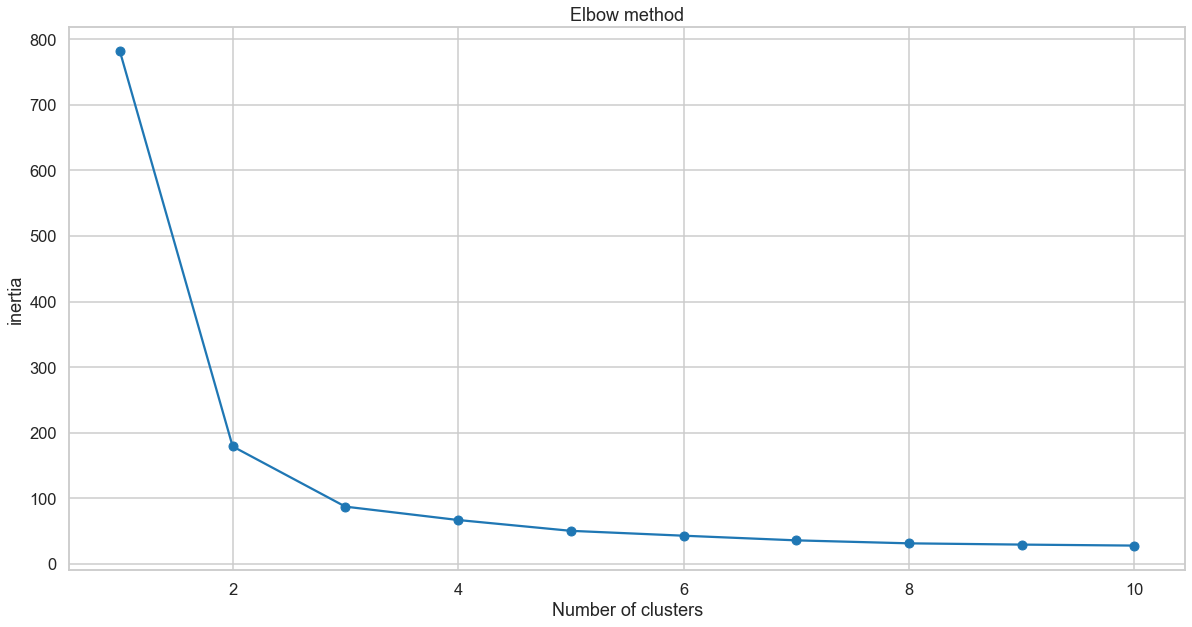

In [31]:
#kmeans clustering

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris_data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

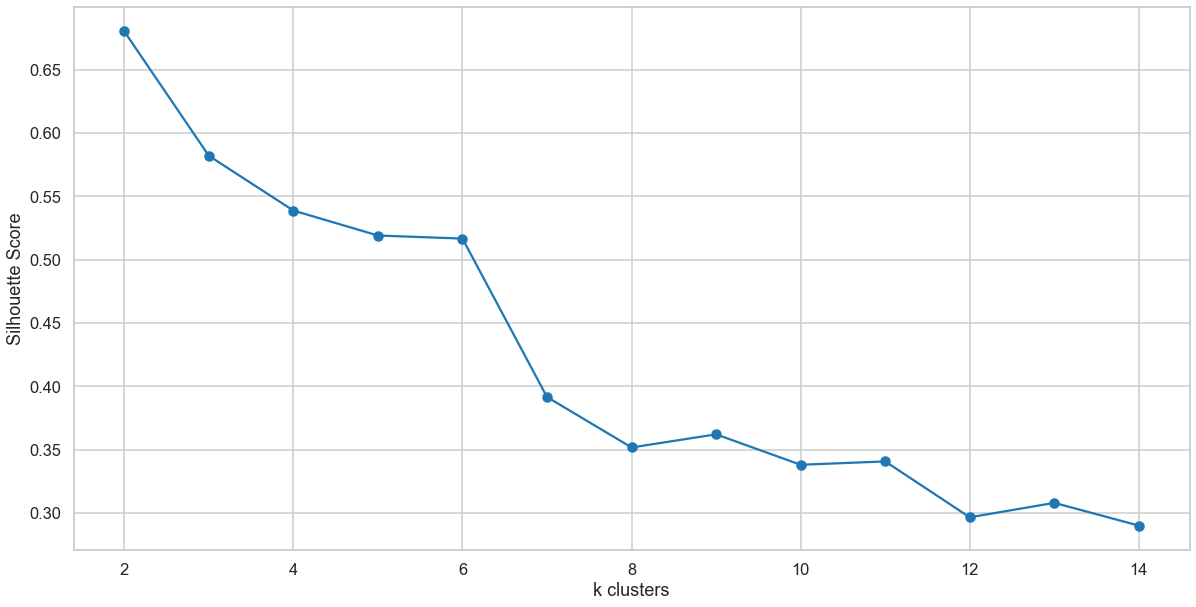

In [32]:
silhouette(iris_data)

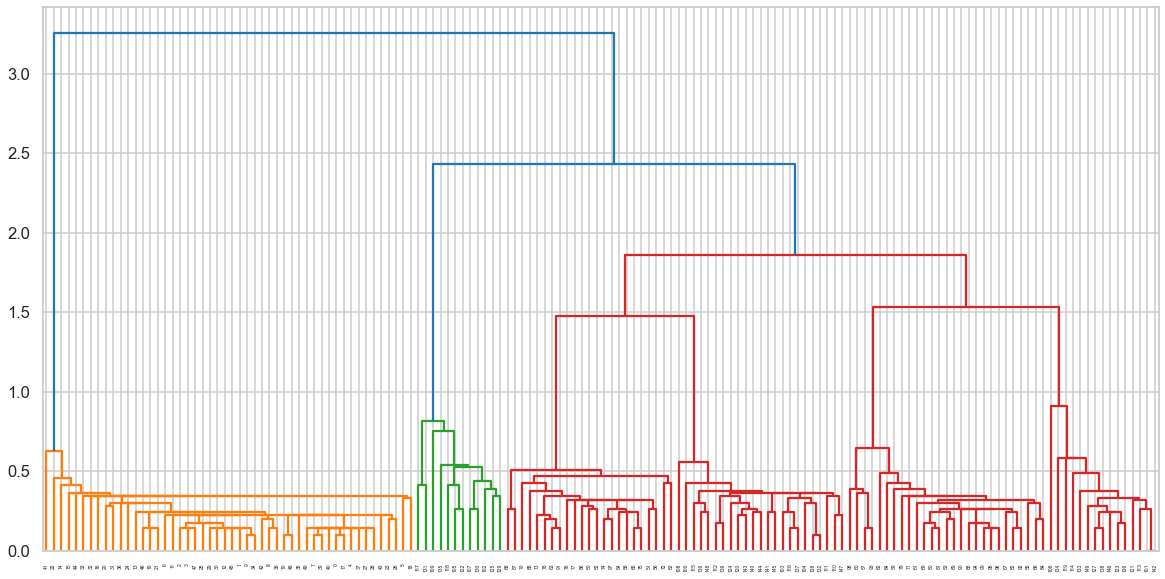

silhouette_score_euclidean=0.7177823076069726


In [39]:
#Hierarchal Clustering
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='single'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



In [ ]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='average'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


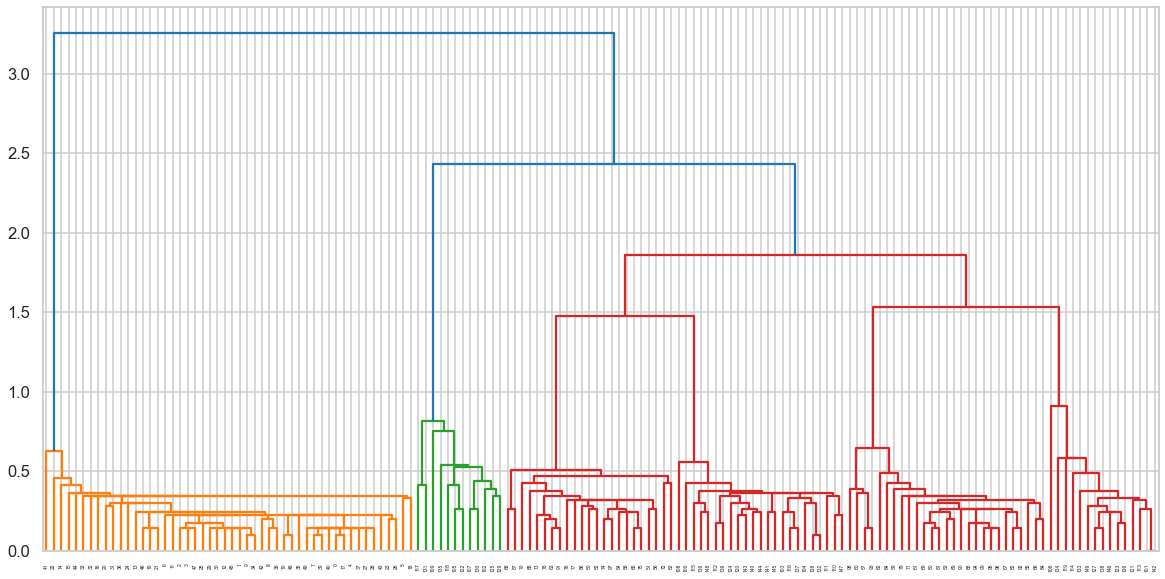

silhouette_score_cosine=0.870617157999181


In [40]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='single'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')



In [ ]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='average'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='single'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')



In [ ]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='average'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')



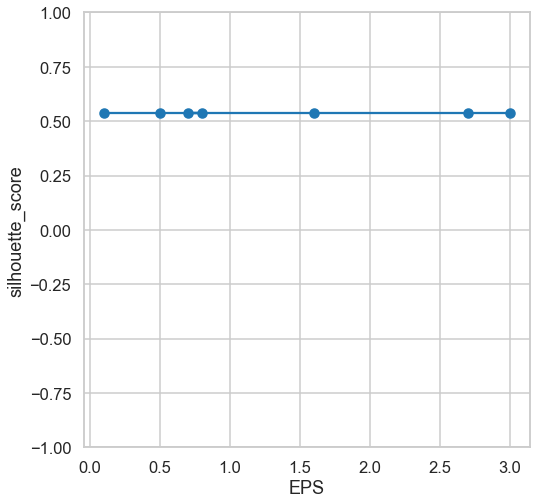

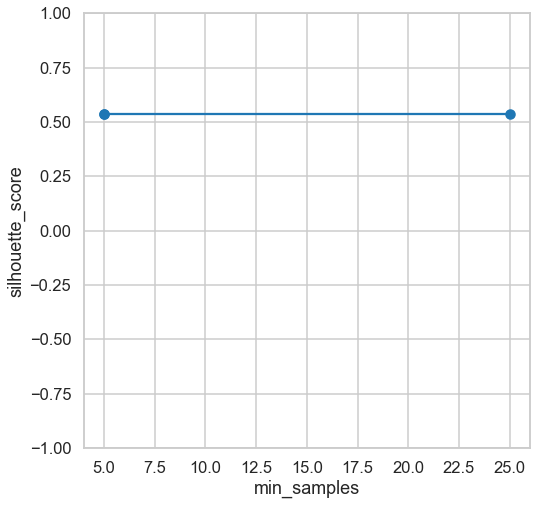

In [25]:
db = DBSCAN(eps=0.7, min_samples=15)
db.fit(iris_data)
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 0.8, 0.7, 1.6, 2.7, 3]
min_samples=[5, 5, 25]
cond=len(np.unique(db.labels_))>1
for eps in eps:
    if(cond):
        epsfinal.append(eps)
        score.append(silhouette_score(iris_data,db.labels_,metric='euclidean'))
       
    
plt.plot(epsfinal,score)
plt.scatter(epsfinal,score)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

for min_samples in min_samples:
    if(cond):
        samplesfinal.append(min_samples)
        score1.append(silhouette_score(iris_data,db.labels_,metric='euclidean'))
       
    
plt.plot(samplesfinal,score1)
plt.scatter(samplesfinal,score1)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

#for min_samples in range(5,25,1):
    #score = silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean')
    #plt.plot(min_samples, score, marker='o')
    #plt.title('silhouette_score vs min_samples ')
    #plt.xlabel('min_samples')
    #plt.ylabel('silhouette_score')
#plt.show()


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [33]:
#GMM
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(iris_data)

#predictions from gmm
labels = gmm.predict(iris_data)
frame = pd.DataFrame(iris_data)
frame['cluster'] = labels
#frame.columns = ['Weight', 'Height', 'cluster']
score = silhouette_score(iris_data,fit,metric='euclidean')
print(score)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T

#Z = gmm.score_samples(XX)
#Z = Z.reshape((50,50))
#plt.contour(X, Y, Z)
#plt.scatter(iris_data[:, 0], iris_data[:, 1])
#plt.show()

#color=['blue','green','cyan', 'black']
#for k in range(0,4):
    #data = frame[frame["cluster"]==k]
    #plt.scatter(data["Weight"],data["Height"],c=color[k])
#plt.show()

0.7167283535330733


In [35]:
#normalizing data 
from sklearn import preprocessing
normalized_data = preprocessing.normalize(iris_data)
display(normalized_data)

array([[0.79397269, 0.54488322, 0.21795329, 0.03113618, 0.        ,
        0.15568092],
       [0.81655326, 0.49993057, 0.23330093, 0.0333287 , 0.        ,
        0.16664352],
       [0.79376492, 0.54043569, 0.219552  , 0.03377723, 0.        ,
        0.16888615],
       [0.78819833, 0.53117713, 0.25702119, 0.03426949, 0.        ,
        0.17134746],
       [0.78125   , 0.5625    , 0.21875   , 0.03125   , 0.        ,
        0.15625   ],
       [0.7760351 , 0.5604698 , 0.24430735, 0.05748408, 0.        ,
        0.1437102 ],
       [0.76912754, 0.56848557, 0.23408229, 0.05016049, 0.        ,
        0.16720164],
       [0.79205591, 0.53859802, 0.23761677, 0.03168224, 0.        ,
        0.15841118],
       [0.79321137, 0.5227984 , 0.25238543, 0.03605506, 0.        ,
        0.18027531],
       [0.80686453, 0.51046531, 0.24699935, 0.01646662, 0.        ,
        0.16466623],
       [0.79497773, 0.54470697, 0.22082715, 0.02944362, 0.        ,
        0.1472181 ],
       [0.77662176, 0

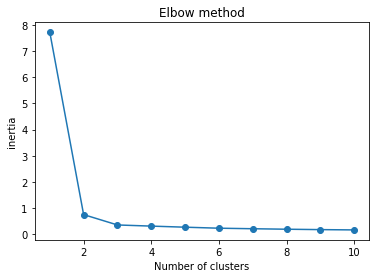

In [8]:
#kmeans clustering

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

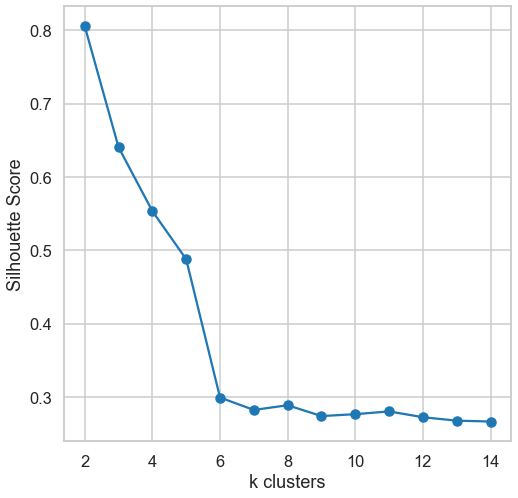

In [13]:
silhouette(normalized_data)

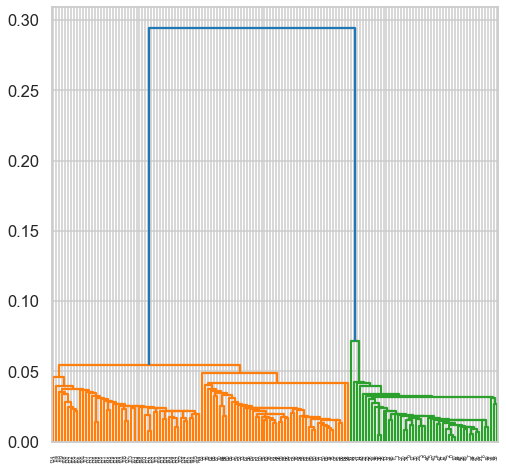

silhouette_score_euclidean=0.350897518754578


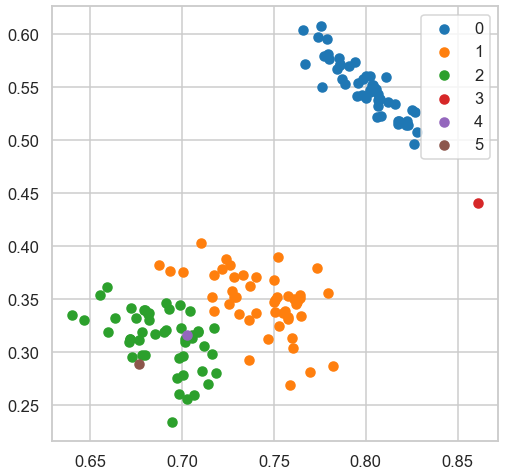

In [14]:
#metric=euclidean

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='single'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


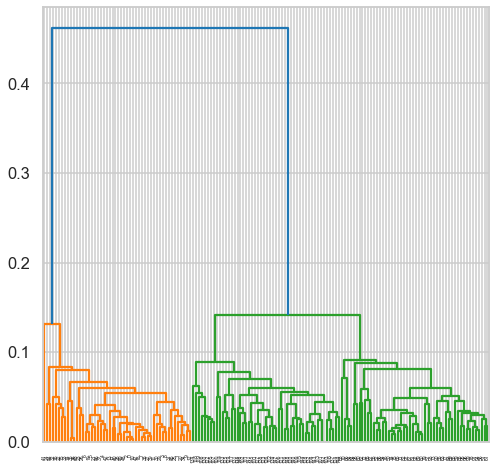

silhouette_score_euclidean=0.39973111405621753


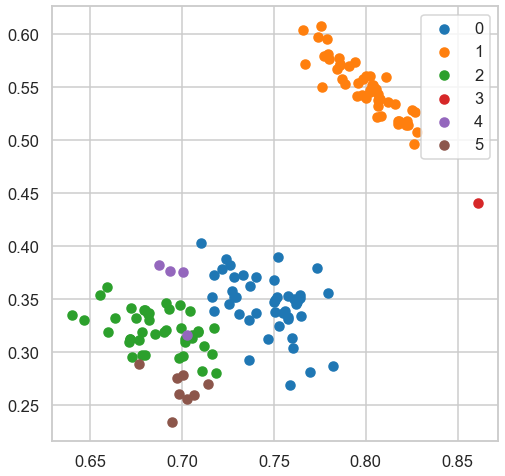

In [15]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='average'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



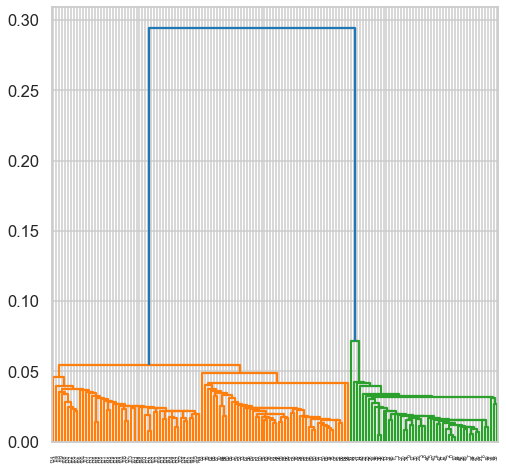

silhouette_score_cosine=0.4704311395312983


In [19]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='single'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


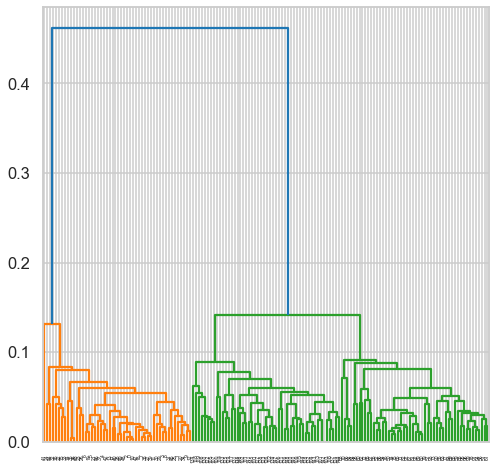

silhouette_score_cosine=0.5578511451627907


In [18]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='average'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


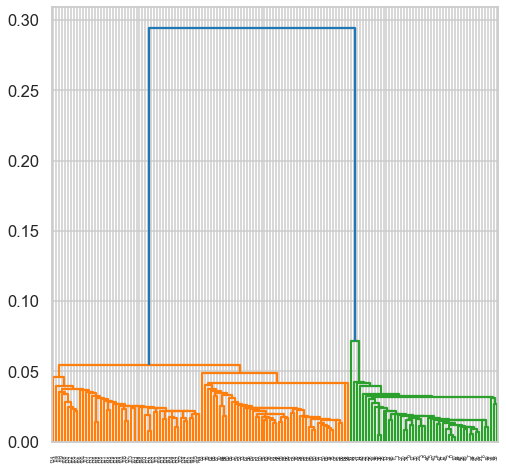

silhouette_score_cosine=0.02321288449061953


In [20]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='single'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')

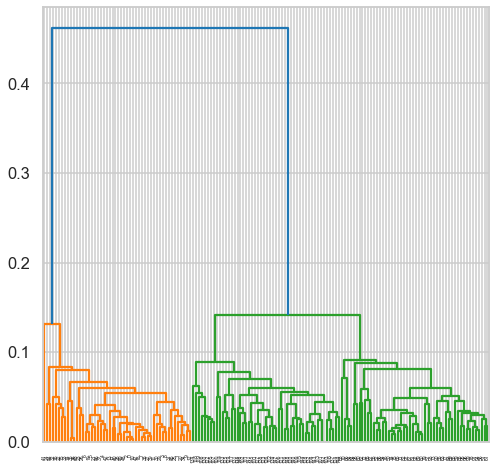

silhouette_score_cosine=0.394767482907579


In [21]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='average'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')

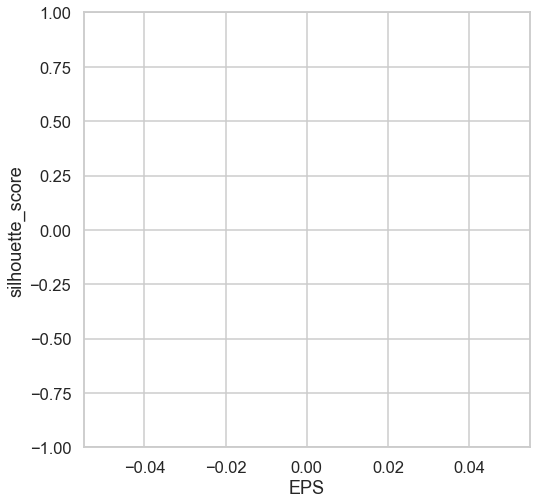

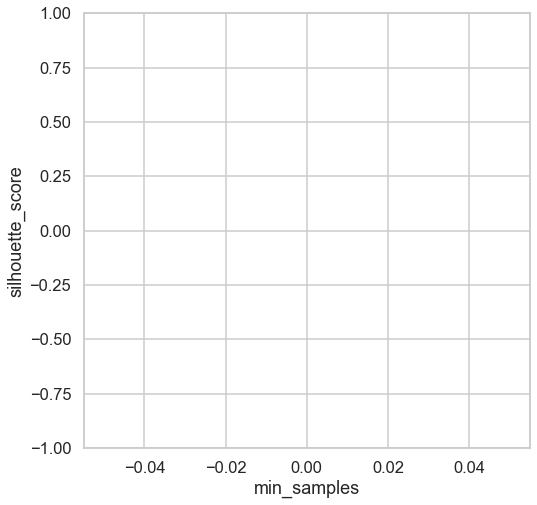

In [26]:
#DBscan
db = DBSCAN(eps=0.7, min_samples=15)
db.fit(normalized_data)
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 0.8, 0.7, 1.6, 2.7, 3]
min_samples=[5, 5, 25]
cond=len(np.unique(db.labels_))>1
for eps in eps:
    if(cond):
        epsfinal.append(eps)
        score.append(silhouette_score(normalized_data,db.labels_,metric='euclidean'))
       
    
plt.plot(epsfinal,score)
plt.scatter(epsfinal,score)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

for min_samples in min_samples:
    if(cond):
        samplesfinal.append(min_samples)
        score1.append(silhouette_score(normalized_data,db.labels_,metric='euclidean'))
       
    
plt.plot(samplesfinal,score1)
plt.scatter(samplesfinal,score1)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

#for min_samples in range(5,25,1):
    #score = silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean')
    #plt.plot(min_samples, score, marker='o')
    #plt.title('silhouette_score vs min_samples ')
    #plt.xlabel('min_samples')
    #plt.ylabel('silhouette_score')
#plt.show()


In [36]:
#GMM
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(normalized_data)

#predictions from gmm
labels = gmm.predict(normalized_data)
frame = pd.DataFrame(normalized_data)
frame['cluster'] = labels
#frame.columns = ['Weight', 'Height', 'cluster']
score = silhouette_score(normalized_data,fit,metric='euclidean')
print(score)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T

#Z = gmm.score_samples(XX)
#Z = Z.reshape((50,50))
#plt.contour(X, Y, Z)
#plt.scatter(iris_data[:, 0], iris_data[:, 1])
#plt.show()

#color=['blue','green','cyan', 'black']
#for k in range(0,4):
    #data = frame[frame["cluster"]==k]
    #plt.scatter(data["Weight"],data["Height"],c=color[k])

0.6978140242018346


## Customer dataset
Repeat all the above on the customer data set 

In [23]:
df = pd.read_csv('Customer data.csv')

In [12]:
display(df)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


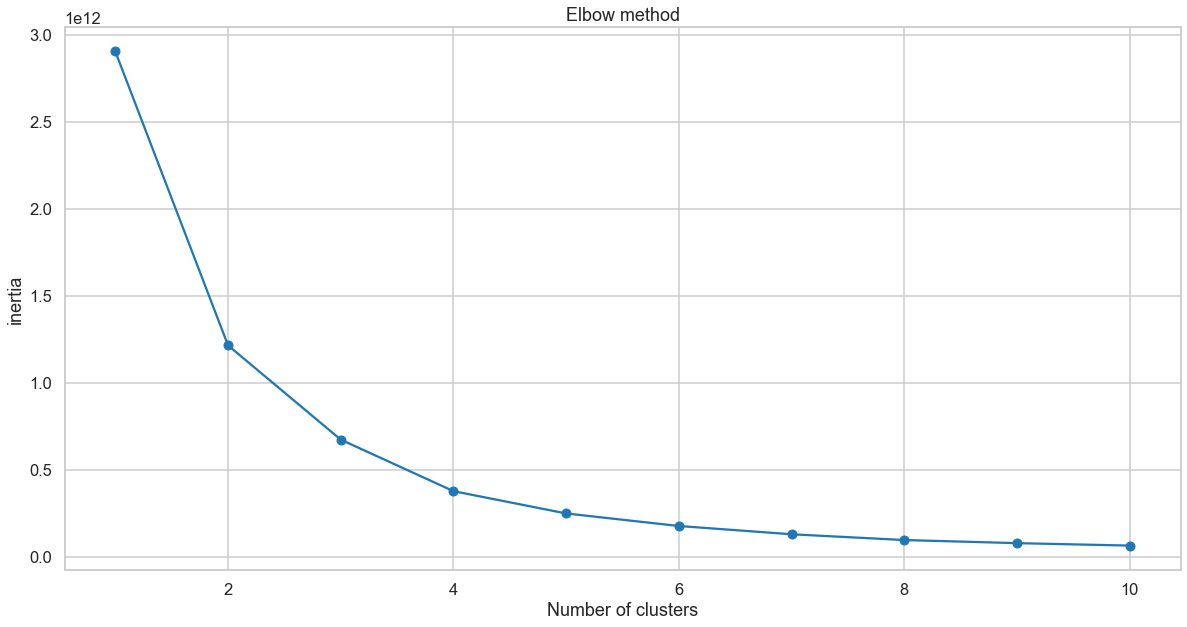

In [13]:
#kmeans clustering

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.values)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

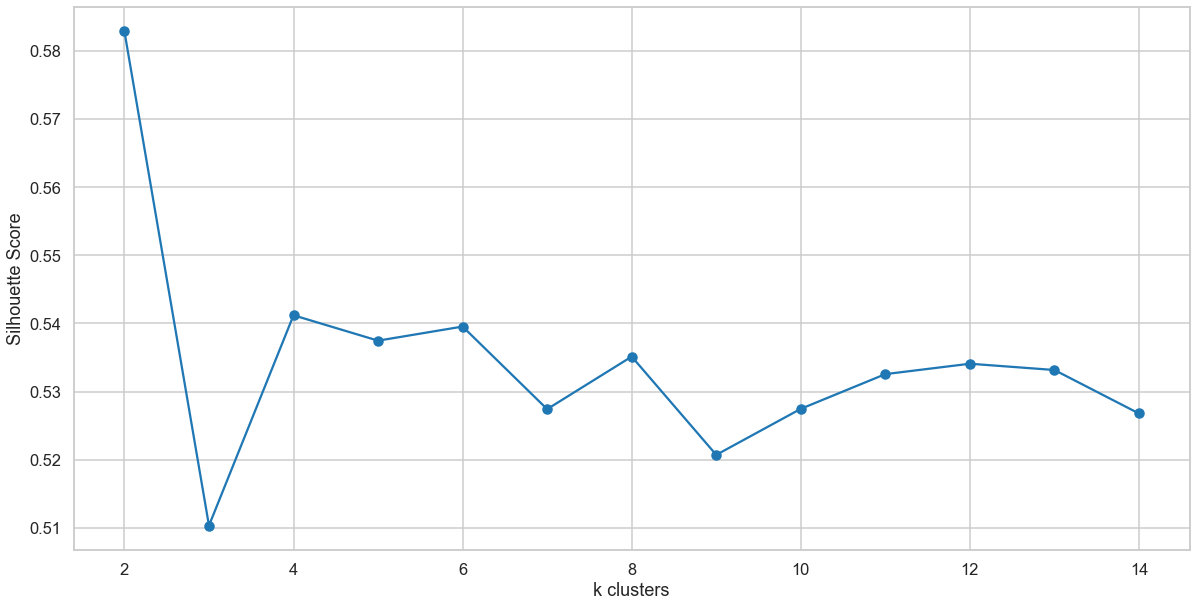

In [15]:
silhouette(df.values)

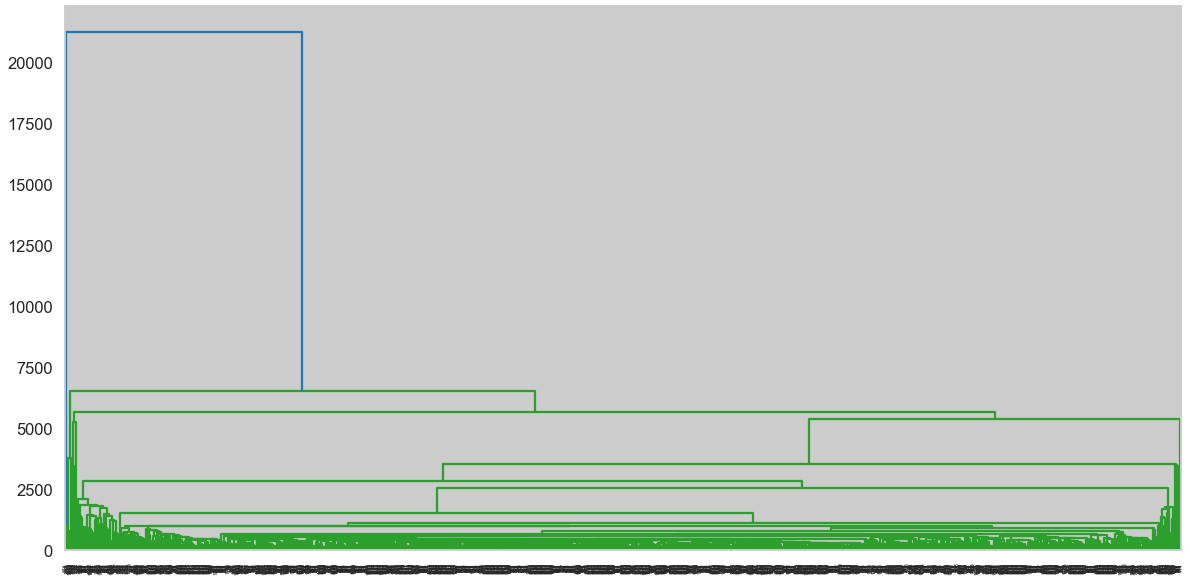

silhouette_score_euclidean=0.6753366082488176


In [46]:
#Hierarchal Clustering
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='single'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



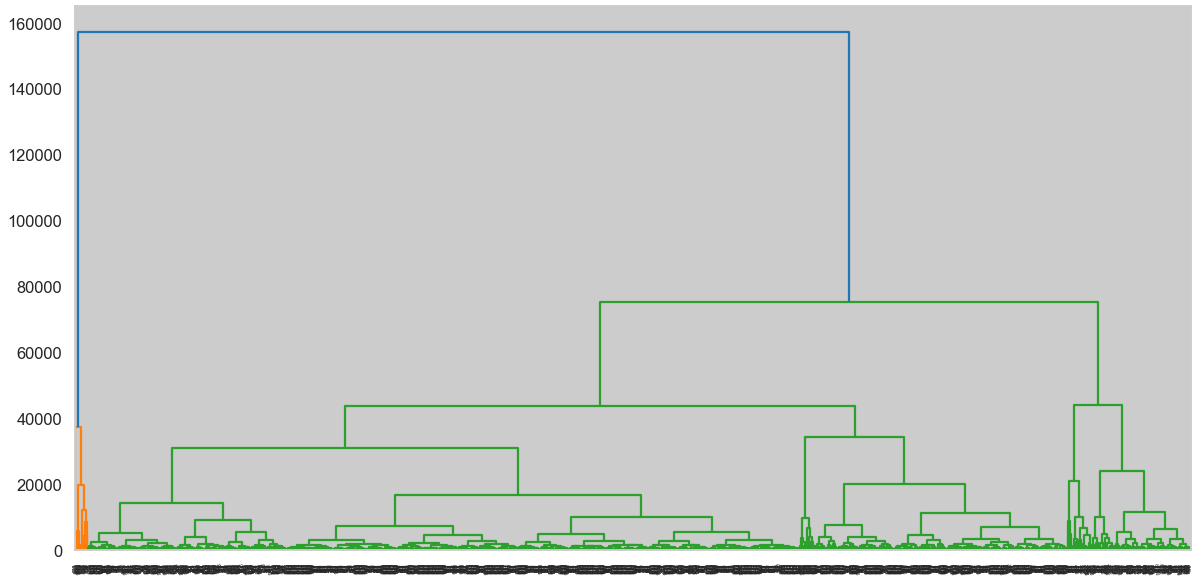

silhouette_score_euclidean=0.46935205847848754


In [47]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



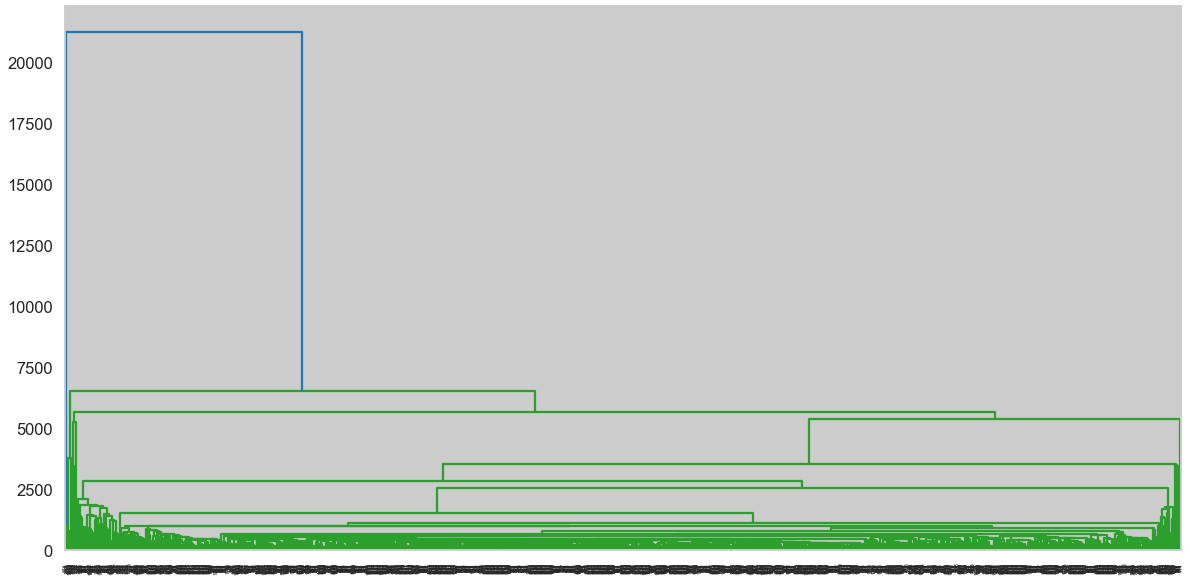

silhouette_score_cosine=0.8002485064961352


In [48]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='single'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


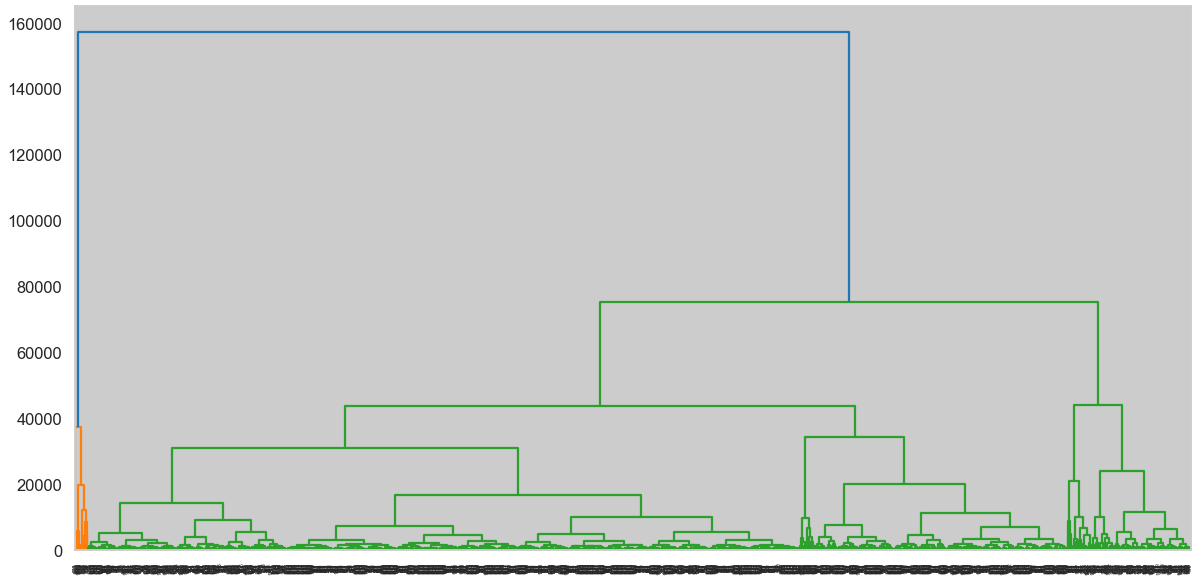

silhouette_score_cosine=0.6715255528871199


In [49]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


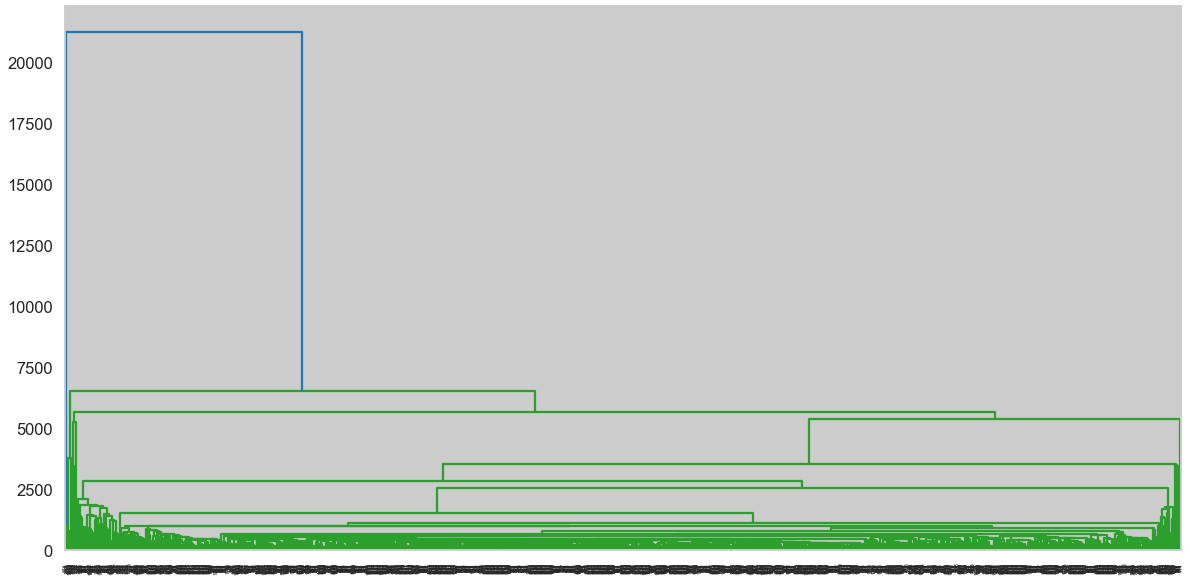

silhouette_score_manhattan=0.6715811498074055


In [50]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='single'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')



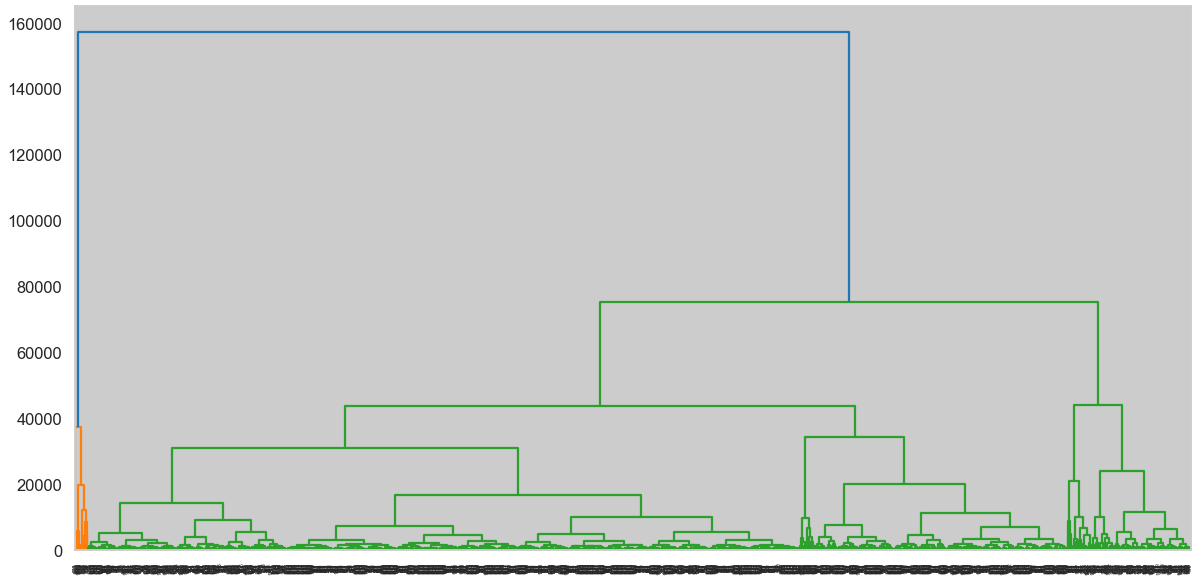

silhouette_score_manhattan=0.42346088775353313


In [45]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')



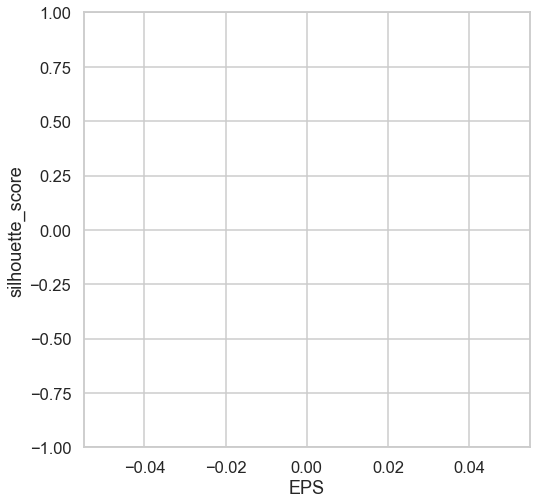

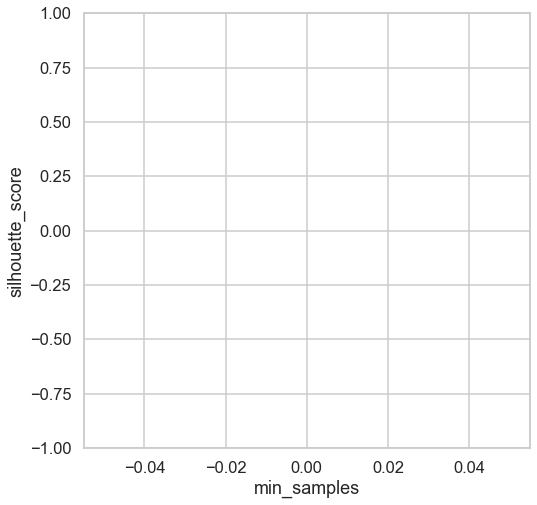

In [29]:
#DBscan
db = DBSCAN(eps=0.7, min_samples=15)
db.fit(df.values)
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 0.8, 0.7, 1.6, 2.7, 3]
min_samples=[5, 5, 25]
cond=len(np.unique(db.labels_))>1
for eps in eps:
    if(cond):
        epsfinal.append(eps)
        score.append(silhouette_score(df.values,db.labels_,metric='euclidean'))
       
    
plt.plot(epsfinal,score)
plt.scatter(epsfinal,score)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

for min_samples in min_samples:
    if(cond):
        samplesfinal.append(min_samples)
        score1.append(silhouette_score(df.values,db.labels_,metric='euclidean'))
       
    
plt.plot(samplesfinal,score1)
plt.scatter(samplesfinal,score1)
#plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(-1,1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

#for min_samples in range(5,25,1):
    #score = silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean')
    #plt.plot(min_samples, score, marker='o')
    #plt.title('silhouette_score vs min_samples ')
    #plt.xlabel('min_samples')
    #plt.ylabel('silhouette_score')
#plt.show()




In [28]:
#GMM
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(df.values)

#predictions from gmm
labels = gmm.predict(df.values)
frame = pd.DataFrame(df.values)
frame['cluster'] = labels
#frame.columns = ['Weight', 'Height', 'cluster']
score = silhouette_score(df.values,fit,metric='euclidean')
print(score)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
#Z = gmm.score_samples(XX)
#Z = Z.reshape((50,50))
#plt.contour(X, Y, Z)
#plt.scatter(df.values[:, 0], df.values[:, 1])
#plt.show()

0.48343595290283553
